# Training a Diabetes Regression Model In Notebook

In [27]:
%matplotlib inline

from azureml.core import Experiment, Workspace
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings

warnings.filterwarnings(action='ignore', message="Using a non-tuple sequence for multidimensional indexing is deprecated")

In [28]:
DATA_PATH = "../../data/"


Workspace name:	demo
Azure region:	eastus
Subscription:	02559c12-8982-43b3-8180-f4e41779489b
Resource group:	azureml_demos


---

## Data
We will use the diabetes dataset for this experiment, a well-known, small dataset that comes with scikit-learn.  This cell loads the dataset and splits it into random training and testing sets.


In [30]:
diabetes_df = pd.read_csv(os.path.join(DATA_PATH,"diabetes.csv"))

diabetes_df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [31]:
y = diabetes_df.pop('target').values
X = diabetes_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print (f"Data contains {len(X_train)} training samples and {len(X_test)} test samples")

Data contains 353 training samples and 89 test samples


---
## Train

Let's use scikit-learn to train a simple Ridge regression model. 

In [32]:
def plot_residuals_v_actuals(y, y_hat):
    """Residuals (y-axis) vs. Actuals (x-axis) - colored green"""
    resids = y - y_hat
    
    fig = plt.figure()
    sns.regplot(y, resids, color='g')
    
    plt.title('Residual vs. Actual')
    plt.xlabel("Actual Value")
    plt.ylabel("Residuals")
    
    plt.close(fig)
    return fig

def plot_predictions(y, y_hat):
    """Predictions (y-axis) vs. Actuals (x-axis)"""
    fig = plt.figure()
    
    sns.regplot(y, y_hat, color='b')
    
    plt.title("Prediction vs. Actual")
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    
    plt.close(fig)
    return fig

def plot_resid_histogram(y, y_hat):
    resids = y - y_hat 

    fig = plt.figure()
    sns.distplot(resids, color='g')
    
    plt.title("Residual Histogram")
    
    plt.close(fig)
    return fig

RMSE:	58.5226
MAE:	46.0835
R2:	0.3321


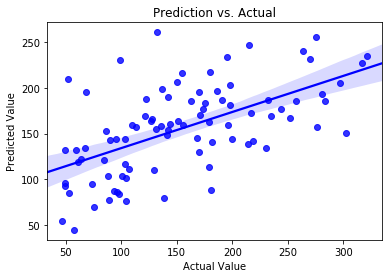

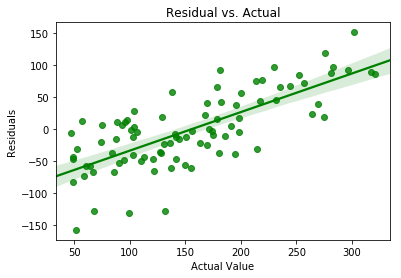

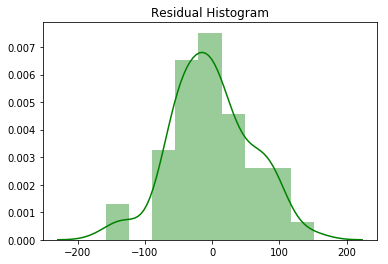

In [34]:
# Log the algorithm parameter alpha to the run
alpha = 0.03

# Create, fit, and test the scikit-learn Ridge regression model
regression_model = Ridge(alpha=alpha)
regression_model.fit(X_train, y_train)
preds = regression_model.predict(X_test)

# Output the Mean Squared Error to the notebook and to the run
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"RMSE:\t{np.round(rmse,4)}",
      f"MAE:\t{np.round(mae,4)}",
      f"R2:\t{np.round(r2,4)}",
      sep='\n')

resid_fig = plot_residuals_v_actuals(y_test, preds)
resid_hist = plot_resid_histogram(y_test, preds)
pred_plt = plot_predictions(y_test, preds)

# Save the model to the outputs directory for capture
# Anything saved to ./outputs/ folder will be sent to Azure ML 
# at the end of the run
joblib.dump(value=regression_model, filename='outputs/model.pkl')
    
display(pred_plt, resid_fig, resid_hist)